In [1]:
import pandas as pd
import numpy as np
import os
import encoders
import models
from sklearn.model_selection import train_test_split
%matplotlib inline

Using TensorFlow backend.


In [13]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = encoders.create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encoders.encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, LSTM
from keras.models import Model
from keras.optimizers import Adam

def model9(vocabulary_size, input_length):
    input_layer = Input(shape=(input_length,))
    x = Embedding(input_dim=vocabulary_size, input_length=input_length, output_dim=128)(input_layer)
    x = LSTM(128)(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(input_layer, x)
    optimizer = Adam(lr=0.0003)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return 'model9-weights.hdf5', model

In [18]:
filepath, model = model9(len(char_to_int) + 1, max_tweet_len)
if filepath in os.listdir():
    model.load_weights(filepath)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 166)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 166, 128)          67328     
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 258       
Total params: 199,170
Trainable params: 199,170
Non-trainable params: 0
_________________________________________________________________


In [19]:
models.train(X_train, y_train, model, filepath)

Epoch 1/100
69168/69168 [==============================] - 278s 4ms/step - loss: 0.6930

Epoch 00001: loss improved from inf to 0.69295, saving model to model9-weights.hdf5
Epoch 2/100
69168/69168 [==============================] - 252s 4ms/step - loss: 0.6928

Epoch 00002: loss improved from 0.69295 to 0.69277, saving model to model9-weights.hdf5
Epoch 3/100
69168/69168 [==============================] - 154s 2ms/step - loss: 0.6919

Epoch 00003: loss improved from 0.69277 to 0.69189, saving model to model9-weights.hdf5
Epoch 4/100
69168/69168 [==============================] - 145s 2ms/step - loss: 0.6904

Epoch 00004: loss improved from 0.69189 to 0.69036, saving model to model9-weights.hdf5
Epoch 5/100
69168/69168 [==============================] - 146s 2ms/step - loss: 0.6900

Epoch 00005: loss improved from 0.69036 to 0.69000, saving model to model9-weights.hdf5
Epoch 6/100
69168/69168 [==============================] - 146s 2ms/step - loss: 0.6895

Epoch 00006: loss improved fro

69168/69168 [==============================] - 146s 2ms/step - loss: 0.6037

Epoch 00048: loss improved from 0.60477 to 0.60375, saving model to model9-weights.hdf5
Epoch 49/100
69168/69168 [==============================] - 145s 2ms/step - loss: 0.6067

Epoch 00049: loss did not improve from 0.60375
Epoch 50/100
69168/69168 [==============================] - 145s 2ms/step - loss: 0.6006

Epoch 00050: loss improved from 0.60375 to 0.60061, saving model to model9-weights.hdf5
Epoch 51/100
69168/69168 [==============================] - 145s 2ms/step - loss: 0.6001

Epoch 00051: loss improved from 0.60061 to 0.60006, saving model to model9-weights.hdf5
Epoch 52/100
69168/69168 [==============================] - 145s 2ms/step - loss: 0.5982

Epoch 00052: loss improved from 0.60006 to 0.59819, saving model to model9-weights.hdf5
Epoch 53/100
69168/69168 [==============================] - 145s 2ms/step - loss: 0.5958

Epoch 00053: loss improved from 0.59819 to 0.59579, saving model to model9

69168/69168 [==============================] - 143s 2ms/step - loss: 0.5312

Epoch 00097: loss did not improve from 0.53040
Epoch 98/100
69168/69168 [==============================] - 144s 2ms/step - loss: 0.5287

Epoch 00098: loss improved from 0.53040 to 0.52875, saving model to model9-weights.hdf5
Epoch 99/100
69168/69168 [==============================] - 143s 2ms/step - loss: 0.5290

Epoch 00099: loss did not improve from 0.52875
Epoch 100/100
69168/69168 [==============================] - 143s 2ms/step - loss: 0.5261

Epoch 00100: loss improved from 0.52875 to 0.52608, saving model to model9-weights.hdf5


In [20]:
predictions = np.argmax(model.predict(X_test), axis=1)

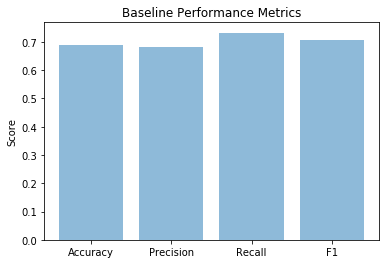

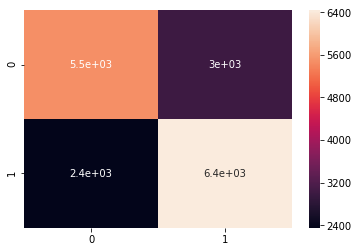

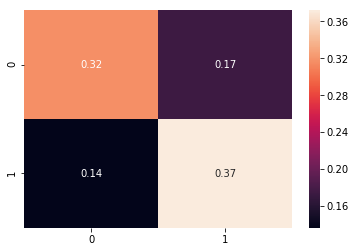

In [21]:
(accuracy, precision, recall, f1), confusion_matrix = models.plot_results(y_test, predictions)